<div class="alert alert-info">
    

# Bonus Assignment 1: Walmart Weekly Sales
# MSDS420 
<br>
<br>

    
**Author:**  Atef Bader, Jonathan De Leon (Requirements)
    
**Last Edit:**  9/9/2021

<br>
</div>

# Important Note:

- This assigement requires at least PostgreSQL 9.5 or  higher release since this assignments uses **ROLLUP** and **CUBE** grouping operations

- Curently the DSCC has a PostgreSQL 10.5 that we will use for this assignment


# Objectives:

- Experiment with SQL grouping operations like CUBE and ROLLUP to retrieve, group and cluster data from Walmart dataset
- Use Ecnomic data to analyze and visualize the weekly total sales per Walmart-store



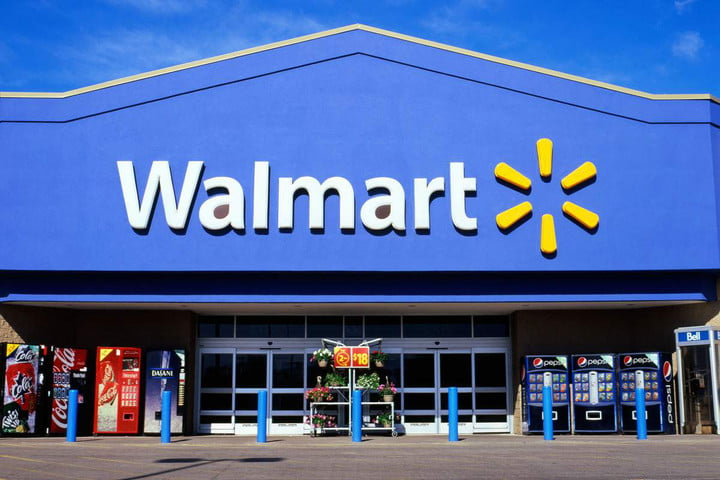

# Descriptions and Requirement Specifications

## Walmart Weekly Sales

Walmart is  the world's largest company by revenue, it has over US$500 billion; Walmart has 11,718 stores and clubs in 28 countries. 


You can read more about Walmart by visitin the following page __[More Info](https://en.wikipedia.org/wiki/Walmart)__ 

## Walmart total weekly sales

Walmart tracks the total weekly sales per store and there is a sample dataset that is published on **Kaggle**, you can read more about this dataset  __[here](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)__ 

In this assignment we will not discuss the store sales **prediction**, rather we will focus on store sales **description**

**Note:** Unlike the employment weekly numbers, the CPI is published monthly by LBS even though it is listed on a weekly basis teh given dataset.

The walmart database is composed of 3 tables that are populated on PosgeSQL10.5 on DSCC. The tables are listed below:

#### Stores:
- Store: The store number. Range from 1-45.
- Type: Three types of stores ‘A’, ‘B’ or ‘C’.
- Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.

#### Weekly_Sales: 
- Store: The store which observation in recorded 1-45.
- Dept: One of 1-99 that shows the department.
- IsHoliday: Boolean value representing a holiday week or not.


#### Features: 
- Temperature:Temperature of the region during that week.
- Fuel_Price: Fuel Price in that region during that week.
- MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.
- CPI: Consumer Price Index during that week.
- Unemployment: The unemployment rate during that week in the region of the store.



# Bureau of Labor Statistics

The Bureau of Labor Statistics __[(BLS)](https://www.bls.gov/home.htm)__  of the U.S. Department of Labor publishes many of the  monthly and weekly MAJOR ECONOMIC INDICATORS that are used to measure the labor market, inflation and price changes in the economy.  You can read more about these indicators __[here](https://www.bls.gov/bls/newsrels.htm#major)__ 

Examples of these indicators that you will see in the database for this assignment are unemployement and CPI



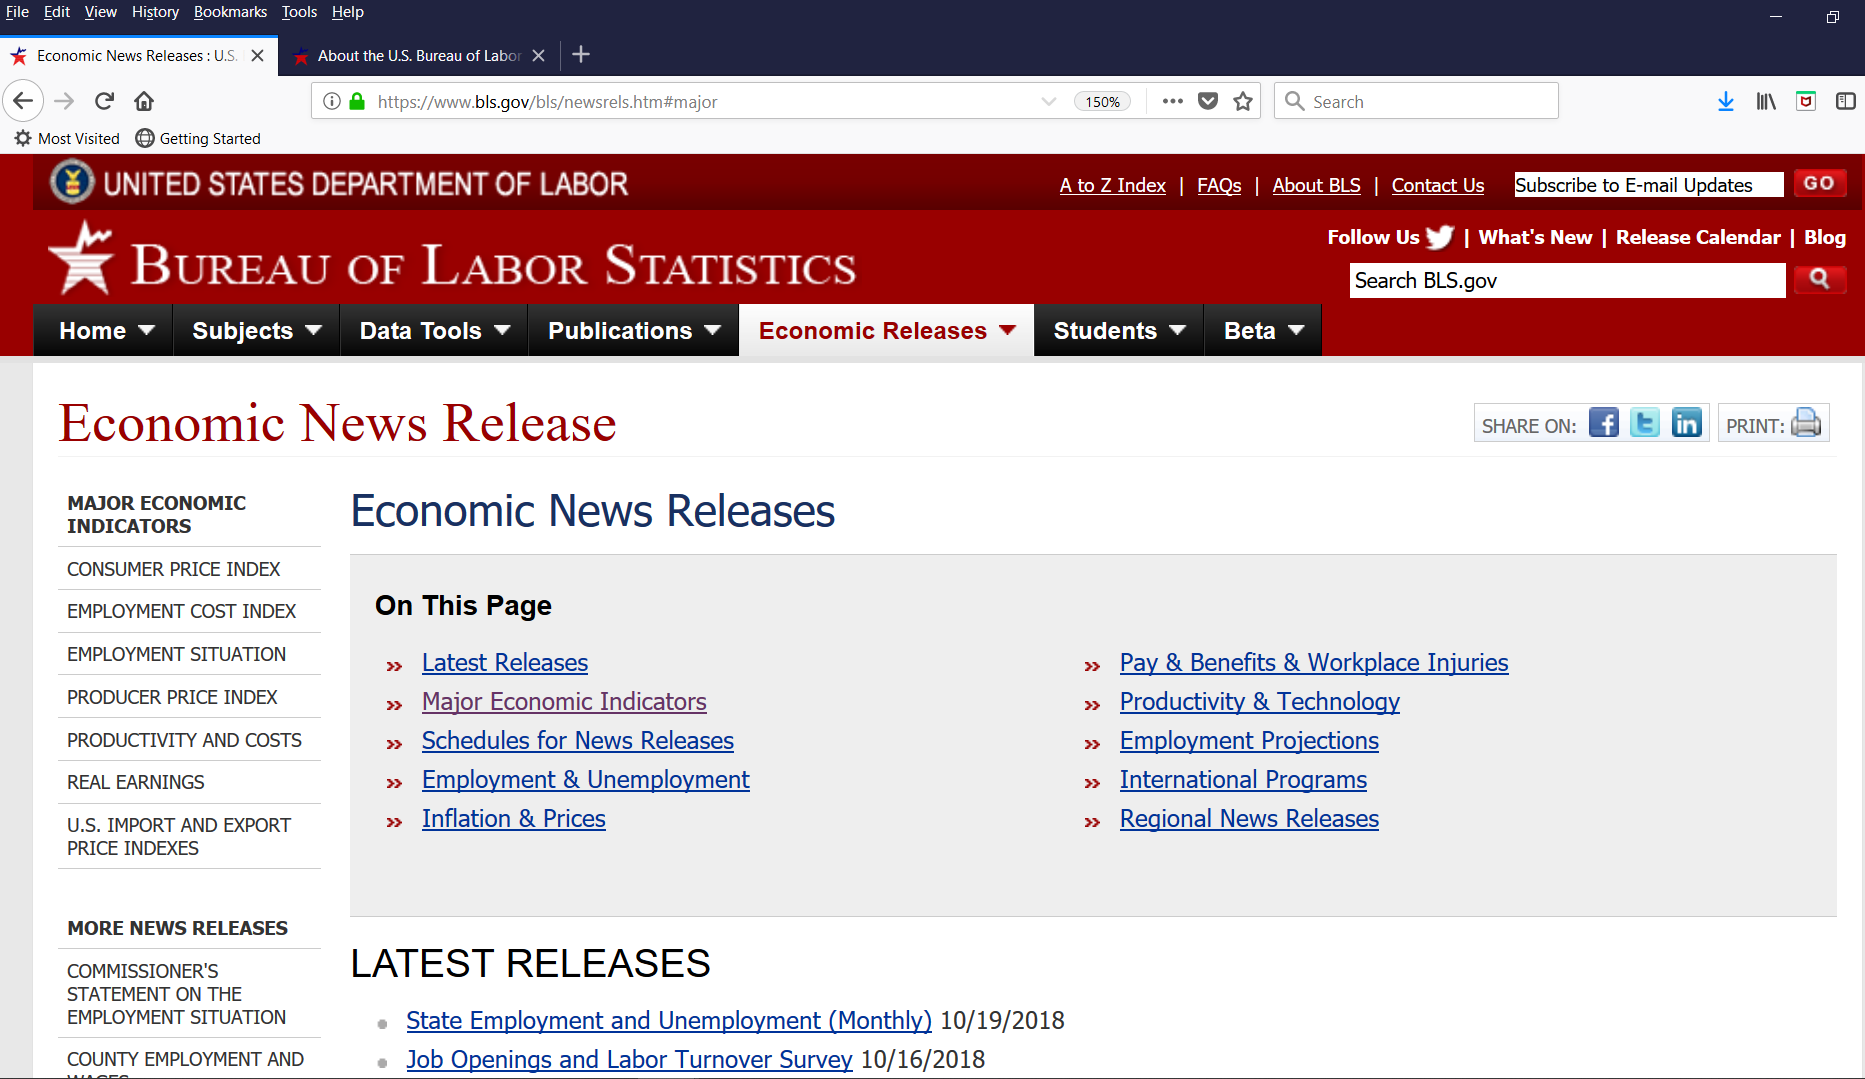

# PostgreSQL 10.5

Postgres provides few programming language constructs for complex grouping operations like ROLLUP and CUBE. You can read more about these grouping operations __[here](https://www.postgresql.org/docs/10/static/queries-table-expressions.html#QUERIES-GROUPING-SETS
)__



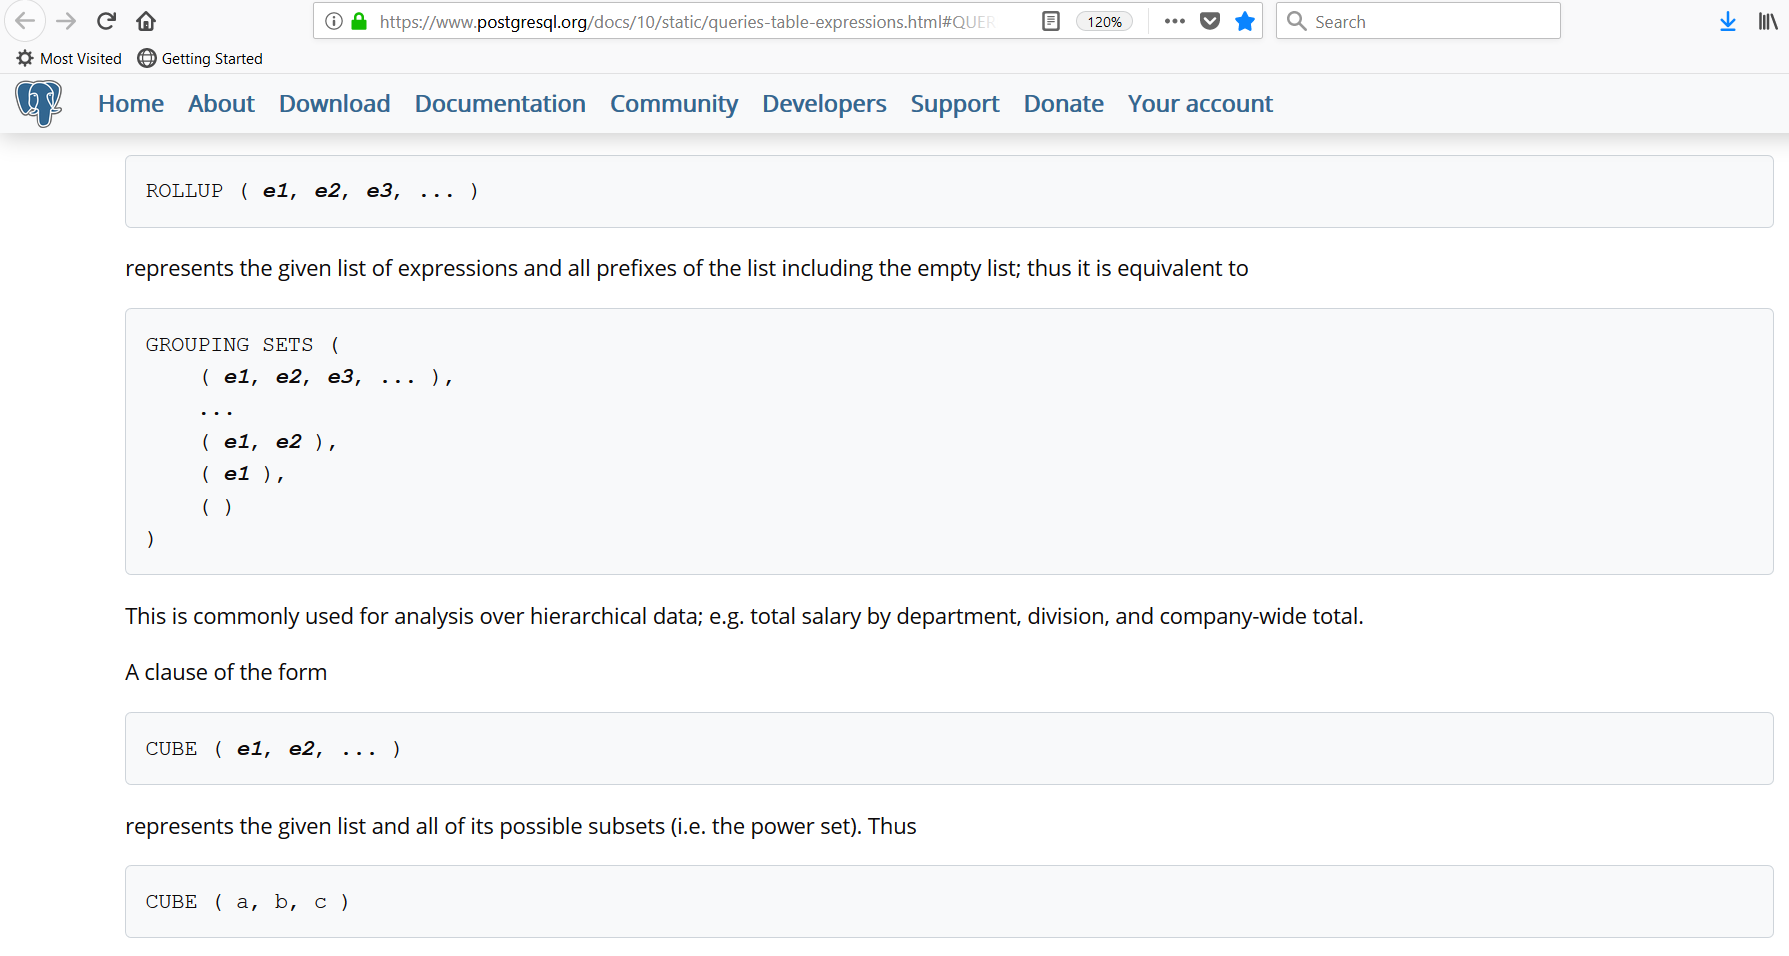




## Import the packages needed

In [1]:

import psycopg2
import csv
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [2]:
#setup the format for the pretty print of Total
pd.options.display.float_format = '{:20,.2f}'.format


### First, we need to connect to the postgresql10 database server
- make sure you are already connected to VPN before you execute the following command 

In [4]:
db_connection = psycopg2.connect(host='129.105.248.26',dbname="walmart", user="jdl7627" , password="xxxxx")


cursor = db_connection.cursor()

## Query #1: 
- Get the total weekly sales by store

In [63]:
cursor.execute("SELECT Store, sum(Weekly_Sales) from weekly_sales GROUP BY Store")
rows=cursor.fetchall()

In [64]:
total_weekly_sales_by_store = pd.DataFrame(rows, columns=['Store','Total'])


total_weekly_sales_by_store.tail()

,Store,Total
40,41,"1,269,393,544.23"
41,42,"556,960,267.01"
42,43,"633,958,047.87"
43,44,"303,051,614.88"
44,45,"786,767,389.94"


## Query #2: 
- Get the total weekly sales by store and department

In [65]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY Store, Dept")
rows=cursor.fetchall()

In [66]:
total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns=['Store','Department','Total'])

total_weekly_sales_by_store_dept = total_weekly_sales_by_store_dept.sort_values(by=['Store', 'Department'])

total_weekly_sales_by_store_dept

,Store,Department,Total
12,1,1,"22,535,836.26"
2015,1,2,"46,148,192.51"
673,1,3,"13,163,628.52"
304,1,4,"37,001,118.63"
35,1,5,"24,282,199.06"
...,...,...,...
1032,45,94,"3,461,475.22"
1447,45,95,"52,949,062.81"
749,45,96,41.58
56,45,97,"6,473,428.85"


## Query #3: 
- Get the total weekly sales by store and week

In [8]:
cursor.execute("SELECT Store, Date, sum(Weekly_Sales) from weekly_sales GROUP BY Store, Date")
rows=cursor.fetchall()

In [9]:
total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns=['Store','Date','Total']) 

total_weekly_sales_by_store_dept = total_weekly_sales_by_store_dept.sort_values(by=['Store', 'Date'])


total_weekly_sales_by_store_dept

,Store,Date,Total
3875,1,2010-02-05,"11,505,836.30"
2272,1,2010-02-12,"11,493,702.08"
4072,1,2010-02-19,"11,283,777.19"
856,1,2010-02-26,"9,868,093.13"
2332,1,2010-03-05,"10,883,646.76"
...,...,...,...
2566,45,2012-09-28,"4,992,217.65"
3426,45,2012-10-05,"5,134,185.49"
5940,45,2012-10-12,"5,141,250.52"
5852,45,2012-10-19,"5,026,878.71"


## Query #4: 
- Get the total weekly sales by department and week

In [10]:
cursor.execute("SELECT Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY Dept, Date")
rows=cursor.fetchall()

In [11]:
total_weekly_sales_by_dept_date = pd.DataFrame(rows, columns=['Dept','Date','Total']) 

total_weekly_sales_by_dept_date = total_weekly_sales_by_dept_date.sort_values(by=['Dept', 'Date'])


total_weekly_sales_by_dept_date

,Dept,Date,Total
8952,1,2010-02-05,"6,172,833.87"
7577,1,2010-02-12,"10,200,276.80"
9110,1,2010-02-19,"7,827,801.52"
6344,1,2010-02-26,"4,769,741.06"
2020,1,2010-03-05,"5,338,567.99"
...,...,...,...
4855,99,2012-09-28,0.07
8752,99,2012-10-05,"81,110.19"
2196,99,2012-10-12,"14,174.51"
9054,99,2012-10-19,0.21


## Query #5: 
- Get the total weekly sales using **ROLLUP** clause for the hierarchical data: store, department and week

In [14]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY ROLLUP(Store, Dept, Date)")
rows=cursor.fetchall()

In [15]:


rollup_by_store_dept_date = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

rollup_by_store_dept_date['Store'] = rollup_by_store_dept_date['Store'].replace(np.nan,-1) 
rollup_by_store_dept_date['Dept'] = rollup_by_store_dept_date['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

rollup_by_store_dept_date['Store'] = rollup_by_store_dept_date['Store'].astype(int)
rollup_by_store_dept_date['Dept'] = rollup_by_store_dept_date['Dept'].astype(int)
rollup_by_store_dept_date['Total'] = rollup_by_store_dept_date['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
rollup_by_store_dept_date['Store'].replace(-1,'',inplace=True)
rollup_by_store_dept_date['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
rollup_by_store_dept_date['Date'] = rollup_by_store_dept_date['Date'].dt.date
rollup_by_store_dept_date['Date'].replace(np.nan,'',inplace=True)
    

rollup_by_store_dept_date = rollup_by_store_dept_date.sort_values(by=['Store', 'Dept', 'Date'])


rollup_by_store_dept_date

,Store,Dept,Date,Total
0,1,1,2010-02-05,"174,471.50"
1,1,1,2010-02-12,"322,276.43"
2,1,1,2010-02-19,"291,168.85"
3,1,1,2010-02-26,"135,824.78"
4,1,1,2010-03-05,"152,795.30"
...,...,...,...,...
424942,45,98,2012-10-19,"5,320.07"
424943,45,98,2012-10-26,"7,537.60"
424944,45,98,,"530,370.89"
424945,45,,,"786,767,389.94"


## Query #6: 
- Get the total weekly sales using **ROLLUP** clause for the hierarchical data: store, department and week

In [16]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY ROLLUP(Store, Dept)")
rows=cursor.fetchall()

In [17]:
rollup_by_store_dept = pd.DataFrame(rows, columns=['Store','Dept','Total']) 

#For the pretty print : Replace NaN by -1

rollup_by_store_dept['Store'] = rollup_by_store_dept['Store'].replace(np.nan,-1) 
rollup_by_store_dept['Dept'] = rollup_by_store_dept['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

rollup_by_store_dept['Store'] = rollup_by_store_dept['Store'].astype(int)
rollup_by_store_dept['Dept'] = rollup_by_store_dept['Dept'].astype(int)
rollup_by_store_dept['Total'] = rollup_by_store_dept['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
rollup_by_store_dept['Store'].replace(-1,'',inplace=True)
rollup_by_store_dept['Dept'].replace(-1,'',inplace=True)
    

rollup_by_store_dept = rollup_by_store_dept.sort_values(by=['Store', 'Dept'])


rollup_by_store_dept

,Store,Dept,Total
13,1,1,"22,535,836.26"
2017,1,2,"46,148,192.51"
674,1,3,"13,163,628.52"
305,1,4,"37,001,118.63"
37,1,5,"24,282,199.06"
...,...,...,...
749,45,96,41.58
56,45,97,"6,473,428.85"
2461,45,98,"530,370.89"
3344,45,,"786,767,389.94"


## Query #7: 
- Get the total weekly sales using **CUBE** clause for the hierarchical data: store, department and week

In [18]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY CUBE(Store, Dept, Date)")
rows=cursor.fetchall()

In [19]:
cube_by_store_dept_date = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

cube_by_store_dept_date['Store'] = cube_by_store_dept_date['Store'].replace(np.nan,-1) 
cube_by_store_dept_date['Dept'] = cube_by_store_dept_date['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

cube_by_store_dept_date['Store'] = cube_by_store_dept_date['Store'].astype(int)
cube_by_store_dept_date['Dept'] = cube_by_store_dept_date['Dept'].astype(int)
cube_by_store_dept_date['Total'] = cube_by_store_dept_date['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
cube_by_store_dept_date['Store'].replace(-1,'',inplace=True)
cube_by_store_dept_date['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
cube_by_store_dept_date['Date'] = cube_by_store_dept_date['Date'].dt.date
cube_by_store_dept_date['Date'].replace(np.nan,'',inplace=True)
    

cube_by_store_dept_date = cube_by_store_dept_date.sort_values(by=['Store', 'Dept', 'Date'])


cube_by_store_dept_date

,Store,Dept,Date,Total
0,1,1,2010-02-05,"174,471.50"
1,1,1,2010-02-12,"322,276.43"
2,1,1,2010-02-19,"291,168.85"
3,1,1,2010-02-26,"135,824.78"
4,1,1,2010-03-05,"152,795.30"
...,...,...,...,...
424964,,,2012-10-05,"332,966,475.17"
425074,,,2012-10-12,"322,899,599.75"
425043,,,2012-10-19,"315,856,873.99"
425063,,,2012-10-26,"318,808,814.03"


## Query #8: 
- Get  the **descriptive statisitics** per store

In [20]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [21]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

#For the pretty print: format date with no time-field
weekly_sales['Date'] = weekly_sales['Date'].dt.date


#### DataFrame  has few good methods for descriptive statistics, grouping, and heirarchical clusterning:
- Count only non-null values, use **count**
- Count total values including null values, use **size** attribute
- Count distinct values, use **nunique**
- **stack()** on the **groupby** result will produce the pretty print

In [22]:
weekly_sales.groupby('Store').agg(['count', 'size', 'nunique', 'max']).stack()

Dept        Date         Weekly_Sales IsHoliday
Store                                                          
1     count    71708       71708            71,708.00     71708
      size     71708       71708            71,708.00     71708
      nunique     77         143            10,042.00         2
      max         99  2012-10-26           203,670.47      True
2     count    71666       71666            71,666.00     71666
...              ...         ...                  ...       ...
44    max         99  2012-10-26            66,629.98      True
45    count    67459       67459            67,459.00     67459
      size     67459       67459            67,459.00     67459
      nunique     74         143             9,381.00         2
      max         98  2012-10-26           240,758.86      True

[180 rows x 4 columns]

## Query #9: 
- Get  the top 500 weekly sales and plot them (Red color for Holiday and Blue color for Not Holiday) against the weekly Unemployment and Temperature 


In [5]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [6]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

weekly_sales = weekly_sales.sort_values(by=['Weekly_Sales'], ascending=False)

In [7]:
top_ten_weekly_sales = weekly_sales[:500]

top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
2203223,10,72,2010-11-26,"693,099.36",True
938513,10,72,2010-11-26,"693,099.36",True
1360083,10,72,2010-11-26,"693,099.36",True
1781653,10,72,2010-11-26,"693,099.36",True
95373,10,72,2010-11-26,"693,099.36",True


In [8]:
cursor.execute("SELECT * from features")
rows=cursor.fetchall()

In [9]:
weekly_sales_temp_unemp = pd.DataFrame(rows, columns=['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'])

In [10]:
# Sanity test that we got good data from db server

weekly_sales_temp_unemp.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,False
1,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,True
2,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,False
3,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,False
4,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,False


In [11]:
weekly_sales_temp_unemp.groupby('Store').agg(['count', 'size', 'nunique', 'max']).stack()

Date          Temperature           Fuel_Price  \
Store                                                                          
1     count                   1274             1,274.00             1,274.00   
      size                    1274             1,274.00             1,274.00   
      nunique                  182               181.00               169.00   
      max      2013-07-26 00:00:00                91.65                 3.91   
2     count                   1274             1,274.00             1,274.00   
...                            ...                  ...                  ...   
44    max      2013-07-26 00:00:00                85.58                 3.85   
45    count                   1274             1,274.00             1,274.00   
      size                    1274             1,274.00             1,274.00   
      nunique                  182               179.00               161.00   
      max      2013-07-26 00:00:00                82.99                 4.07   

                         MarkDown1            MarkDown2            MarkDown3  \
Store                                                                          
1     count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                73.00                89.00   
      max                72,937.29            46,011.38            74,910.32   
2     count               1,274.00             1,274.00             1,274.00   
...                            ...                  ...                  ...   
44    max                 3,297.48             1,821.61               106.31   
45    count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                71.00                89.00   
      max                53,311.88            43,941.56            72,542.01   

                         MarkDown4            MarkDown5                  CPI  \
Store                                                                          
1     count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                91.00               168.00   
      max                32,403.87            20,475.32               225.17   
2     count               1,274.00             1,274.00             1,274.00   
...                            ...                  ...                  ...   
44    max                    89.76             2,583.41               132.72   
45    count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                91.00               168.00   
      max                38,157.91            17,861.50               193.59   

                      Unemployment IsHoliday  
Store                                         
1     count               1,274.00      1274  
      size                1,274.00      1274  
      nunique                15.00         2  
      max                     8.11      True  
2     count               1,274.00      1274  
...                            ...       ...  
44    max                     8.12      True  
45    count               1,274.00      1274  
      size                1,274.00      1274  
      nunique                14.00         2  
      max                     8.99      True  

[180 rows x 11 columns]

In [12]:
unemployment = []
temperature = []

for row in top_ten_weekly_sales.itertuples():
    temperature.append(weekly_sales_temp_unemp[(weekly_sales_temp_unemp.Store == row.Store) & (weekly_sales_temp_unemp.Date == row.Date)]['Temperature'].values[0])
    unemployment.append(weekly_sales_temp_unemp[(weekly_sales_temp_unemp.Store == row.Store) & (weekly_sales_temp_unemp.Date == row.Date)]['Unemployment'].values[0])



In [13]:
se_unemployment = pd.Series(unemployment)
se_temperature = pd.Series(temperature)

In [14]:
top_ten_weekly_sales.insert(loc=5, column='Unemployment', value=se_unemployment.values)
top_ten_weekly_sales.insert(loc=6, column='Temperature', value=se_temperature.values)


In [15]:
top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unemployment,Temperature
2203223,10,72,2010-11-26,"693,099.36",True,9.00,55.33
938513,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1360083,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1781653,10,72,2010-11-26,"693,099.36",True,9.00,55.33
95373,10,72,2010-11-26,"693,099.36",True,9.00,55.33


In [16]:
top_ten_weekly_sales.describe()

,Store,Dept,Weekly_Sales,Unemployment,Temperature
count,500.00,500.00,500.00,500.00,500.00
mean,16.80,60.63,"328,468.78",8.26,47.25
std,10.15,27.06,"95,823.91",1.86,11.69
min,2.00,5.00,"240,758.86",4.42,24.76
25%,10.00,72.00,"261,136.32",7.44,40.81
50%,14.00,72.00,"296,628.29",8.07,46.67
75%,22.00,72.00,"359,995.60",8.72,56.43
max,45.00,92.00,"693,099.36",14.31,72.55


In [17]:

feature0_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Weekly_Sales'].values
feature0_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Weekly_Sales'].values

feature1_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Unemployment'].values
feature1_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Unemployment'].values

feature2_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Temperature'].values
feature2_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Temperature'].values




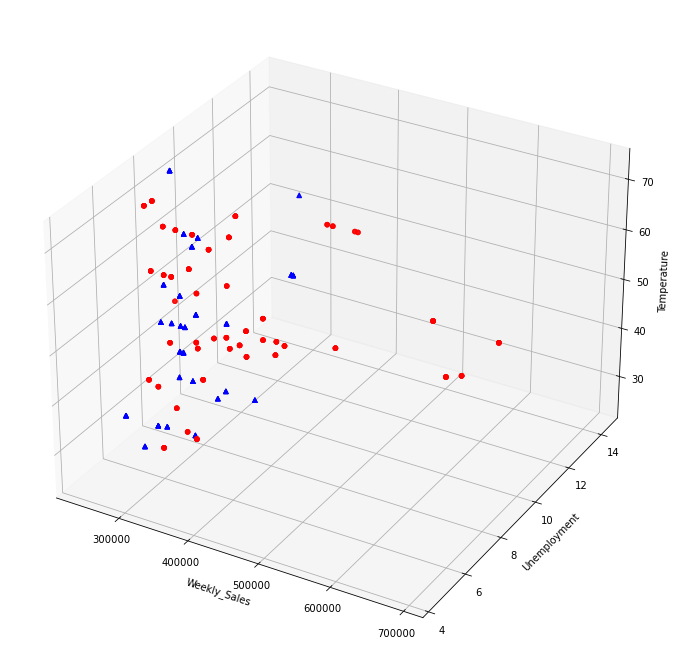

In [18]:
# Plot the raw data  

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')



x_ax_holiday = np.array(feature0_holiday)
y_ax_holiday = np.array(feature1_holiday)
z_ax_holiday = np.array(feature2_holiday)

x_ax_not_holiday = np.array(feature0_not_holiday)
y_ax_not_holiday = np.array(feature1_not_holiday)
z_ax_not_holiday = np.array(feature2_not_holiday)


ax.scatter(x_ax_holiday, y_ax_holiday, z_ax_holiday, marker='o', c = 'red')
ax.scatter(x_ax_not_holiday, y_ax_not_holiday, z_ax_not_holiday, marker='^', c = 'blue')



ax.set_xlabel('Weekly_Sales')
ax.set_ylabel('Unemployment')
ax.set_zlabel('Temperature')



plt.show()

# Requirements



** The PDF document and you rIPYNB script that you are submitting on Canvas must have the source code and the output for the following  requirements **


### Requirement #1: 
- Discuss the difference between **ROLLUP** and the **CUBE** that can be used in the **Group By** clause of the **SQL-SELECT** statement in PostgreSQL 10.5. 

For me personally, the best explanation for the uses and differences for ROLLUP and CUBE is the image below. It is very similar to the image near the top of this notebook. CUBE and ROLLUP enhance performance by not having to create multiple queries to get data about subtotals, or nearly any aggregation.

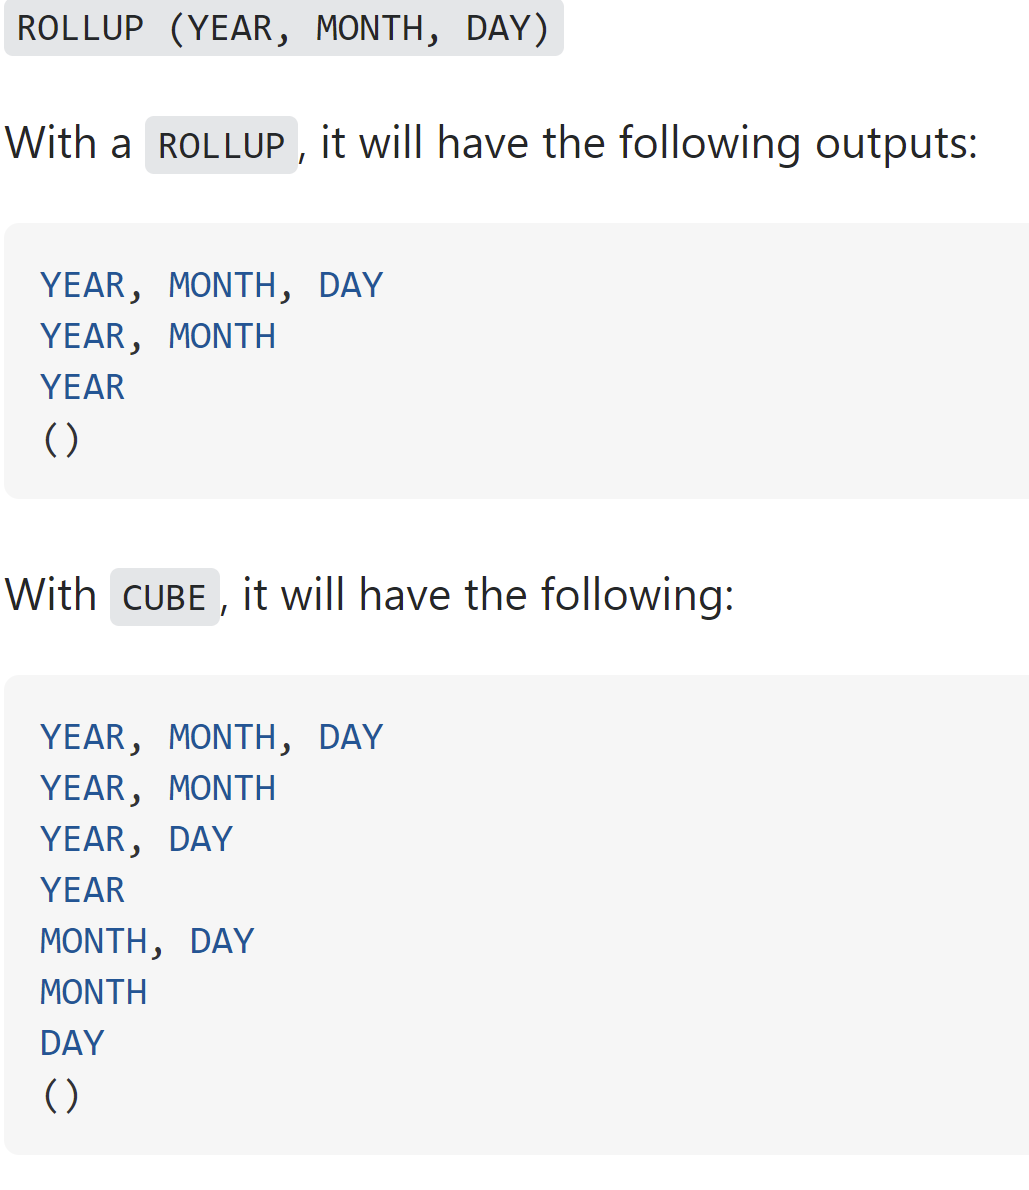

### Requirement #2: 
- Get the descriptive statisitics per department

In [37]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [57]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

#For the pretty print: format date with no time-field
weekly_sales['Date'] = weekly_sales['Date'].dt.date

In [58]:
weekly_sales.groupby('Dept').agg(['count', 'size', 'nunique', 'max']).stack()

Store        Date         Weekly_Sales IsHoliday
Dept                                                          
1    count    45045       45045            45,045.00     45045
     size     45045       45045            45,045.00     45045
     nunique     45         143             6,427.00         2
     max         45  2012-10-26           172,225.55      True
2    count    45045       45045            45,045.00     45045
...             ...         ...                  ...       ...
98   max         45  2012-10-26            33,759.90      True
99   count     6034        6034             6,034.00      6034
     size      6034        6034             6,034.00      6034
     nunique     37          94               311.00         2
     max         44  2012-10-26            12,550.00      True

[324 rows x 4 columns]

### Requirement #3: 
- Use the **CUBE** and dataframe to produce a listing of total sales per department across the entire list of stores

In [87]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY CUBE(Store, Dept)")
rows=cursor.fetchall()

In [88]:
cube_by_store_dept = pd.DataFrame(rows, columns=['Store','Dept','Total']) 

#For the pretty print : Replace NaN by -1

cube_by_store_dept['Store'] = cube_by_store_dept['Store'].replace(np.nan,-1) 
cube_by_store_dept['Dept'] = cube_by_store_dept['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

cube_by_store_dept['Store'] = cube_by_store_dept['Store'].astype(int)
cube_by_store_dept['Dept'] = cube_by_store_dept['Dept'].astype(int)
cube_by_store_dept['Total'] = cube_by_store_dept['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
cube_by_store_dept['Store'].replace(-1,'',inplace=True)
cube_by_store_dept['Dept'].replace(-1,'',inplace=True)
    

cube_by_store_dept = cube_by_store_dept.sort_values(by=['Store', 'Dept'])


cube_by_store_dept

,Store,Dept,Total
13,1,1,"22,535,836.26"
2017,1,2,"46,148,192.51"
674,1,3,"13,163,628.52"
305,1,4,"37,001,118.63"
37,1,5,"24,282,199.06"
...,...,...,...
3385,,96,"516,837,413.12"
3402,,97,"626,475,583.30"
3410,,98,"278,802,435.59"
3413,,99,"2,507,048.95"


## Requirement #4: 

- Use the **CUBE** and dataframe to produce a listing of total sales per store across the entire list of departments for the week of 2010-02-19

In [101]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales WHERE Date= '2010-02-19' GROUP BY CUBE(Store, Dept, Date)")
rows=cursor.fetchall()

In [103]:
cube_store_dept_feb = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

cube_store_dept_feb['Store'] = cube_store_dept_feb['Store'].replace(np.nan,-1) 
cube_store_dept_feb['Dept'] = cube_store_dept_feb['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

cube_store_dept_feb['Store'] = cube_store_dept_feb['Store'].astype(int)
cube_store_dept_feb['Dept'] = cube_store_dept_feb['Dept'].astype(int)
cube_store_dept_feb['Total'] = cube_store_dept_feb['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
cube_store_dept_feb['Store'].replace(-1,'',inplace=True)
cube_store_dept_feb['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
cube_store_dept_feb['Date'] = cube_store_dept_feb['Date'].dt.date
cube_store_dept_feb['Date'].replace(np.nan,'',inplace=True)
    

cube_store_dept_feb = cube_store_dept_feb.sort_values(by=['Store', 'Dept', 'Date'])

cube_store_dept_feb

,Store,Dept,Date,Total
2430,1,1,2010-02-19,"291,168.85"
2988,1,1,,"291,168.85"
1298,1,2,2010-02-19,"335,502.23"
4776,1,2,,"335,502.23"
2452,1,3,2010-02-19,"80,664.29"
...,...,...,...,...
6112,,98,,"2,134,984.95"
6002,,99,2010-02-19,62.93
6115,,99,,62.93
6203,,,2010-02-19,"337,938,956.46"


In [120]:
#proof for total at end
cube_store_dept_feb.iloc[140:155]

,Store,Dept,Date,Total
1299,1,95,2010-02-19,"755,664.49"
3493,1,95,,"755,664.49"
2665,1,97,2010-02-19,"221,100.46"
3566,1,97,,"221,100.46"
1286,1,98,2010-02-19,"84,615.65"
3006,1,98,,"84,615.65"
6179,1,,2010-02-19,"11,283,777.19"
5990,1,,,"11,283,777.19"
1920,2,1,2010-02-19,"407,550.64"
5184,2,1,,"407,550.64"


Alternatively we can query without cube to remove some of the redundant rows. Unfortunately, this means that we wouldn't get the total of each store at the end. For this dataframe, it would have been helpful to have another column next to each 2010-02-19 week total. I was starting to attempt this by creating a view and then joining the two dataframes. I stopped in the end because I realize that this is the beauty of ROLLUP and CUBE.

In [4]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales WHERE Date= '2010-02-19' GROUP BY Store, Dept, Date")
rows=cursor.fetchall()


In [5]:
store_dept_feb = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

store_dept_feb['Store'] = store_dept_feb['Store'].replace(np.nan,-1) 
store_dept_feb['Dept'] = store_dept_feb['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

store_dept_feb['Store'] = store_dept_feb['Store'].astype(int)
store_dept_feb['Dept'] = store_dept_feb['Dept'].astype(int)
store_dept_feb['Total'] = store_dept_feb['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
store_dept_feb['Store'].replace(-1,'',inplace=True)
store_dept_feb['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
store_dept_feb['Date'] = store_dept_feb['Date'].dt.date
store_dept_feb['Date'].replace(np.nan,'',inplace=True)
    

store_dept_feb = store_dept_feb.sort_values(by=['Store', 'Dept', 'Date'])

store_dept_feb

,Store,Dept,Date,Total
2429,1,1,2010-02-19,"291,168.85"
1297,1,2,2010-02-19,"335,502.23"
2451,1,3,2010-02-19,"80,664.29"
2922,1,4,2010-02-19,"257,788.65"
643,1,5,2010-02-19,"185,277.89"
...,...,...,...,...
1239,45,93,2010-02-19,"15,911.28"
1787,45,94,2010-02-19,70.00
132,45,95,2010-02-19,"330,503.60"
1272,45,97,2010-02-19,"39,923.94"


## Requirement #5: 

- Use the **CUBE** and dataframe to produce a listing of total sales per department across the entire list of stores for the week of 2010-02-19

In [18]:
cursor.execute("SELECT Dept, Store, Date, sum(Weekly_Sales) from weekly_sales WHERE Date= '2010-02-19' GROUP BY CUBE(Dept, Store, Date)")
rows=cursor.fetchall()

In [20]:
cube_switch = pd.DataFrame(rows, columns=['Dept','Store','Date','Total']) 

#For the pretty print : Replace NaN by -1

cube_switch['Store'] = cube_switch['Store'].replace(np.nan,-1) 
cube_switch['Dept'] = cube_switch['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

cube_switch['Store'] = cube_switch['Store'].astype(int)
cube_switch['Dept'] = cube_switch['Dept'].astype(int)
cube_switch['Total'] = cube_switch['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
cube_switch['Store'].replace(-1,'',inplace=True)
cube_switch['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
cube_switch['Date'] = cube_switch['Date'].dt.date
cube_switch['Date'].replace(np.nan,'',inplace=True)
    

cube_switch = cube_switch.sort_values(by=['Dept','Store', 'Date'])

cube_switch

,Dept,Store,Date,Total
2431,1,1,2010-02-19,"291,168.85"
2988,1,1,,"291,168.85"
1268,1,2,2010-02-19,"407,550.64"
4816,1,2,,"407,550.64"
2453,1,3,2010-02-19,"62,428.17"
...,...,...,...,...
6121,,44,,"1,875,694.10"
6036,,45,2010-02-19,"5,888,848.28"
6091,,45,,"5,888,848.28"
6203,,,2010-02-19,"337,938,956.46"


In [21]:
#check
cube_switch.iloc[6100:6150]

,Dept,Store,Date,Total
968,98,44,2010-02-19,"21,756.84"
4078,98,44,,"21,756.84"
735,98,45,2010-02-19,"1,967.00"
5135,98,45,,"1,967.00"
6130,98,,2010-02-19,"2,134,984.95"
5988,98,,,"2,134,984.95"
2619,99,4,2010-02-19,62.86
5883,99,4,,62.86
1925,99,19,2010-02-19,0.07
3193,99,19,,0.07




## Requirement #6: 

- Get  the top 500 weekly sales and plot them (Red color for Unemployment greater than or equal to 5 and Green color if it is less than 5) against the weekly Unemployment and Temperature 


In [24]:
# will use df previously made in query 9

In [19]:
top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unemployment,Temperature
2203223,10,72,2010-11-26,"693,099.36",True,9.00,55.33
938513,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1360083,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1781653,10,72,2010-11-26,"693,099.36",True,9.00,55.33
95373,10,72,2010-11-26,"693,099.36",True,9.00,55.33


In [20]:
top_ten_weekly_sales.describe()

,Store,Dept,Weekly_Sales,Unemployment,Temperature
count,500.00,500.00,500.00,500.00,500.00
mean,16.80,60.63,"328,468.78",8.26,47.25
std,10.15,27.06,"95,823.91",1.86,11.69
min,2.00,5.00,"240,758.86",4.42,24.76
25%,10.00,72.00,"261,136.32",7.44,40.81
50%,14.00,72.00,"296,628.29",8.07,46.67
75%,22.00,72.00,"359,995.60",8.72,56.43
max,45.00,92.00,"693,099.36",14.31,72.55


In [21]:

feature0_b_unemp = top_ten_weekly_sales[top_ten_weekly_sales.Unemployment >= 5]['Weekly_Sales'].values
feature0_g_unemp = top_ten_weekly_sales[top_ten_weekly_sales.Unemployment < 5]['Weekly_Sales'].values

feature1_b_unemp = top_ten_weekly_sales[top_ten_weekly_sales.Unemployment >= 5]['Unemployment'].values
feature1_g_unemp = top_ten_weekly_sales[top_ten_weekly_sales.Unemployment < 5]['Unemployment'].values

feature2_b_unemp = top_ten_weekly_sales[top_ten_weekly_sales.Unemployment >= 5]['Temperature'].values
feature2_g_unemp = top_ten_weekly_sales[top_ten_weekly_sales.Unemployment < 5]['Temperature'].values


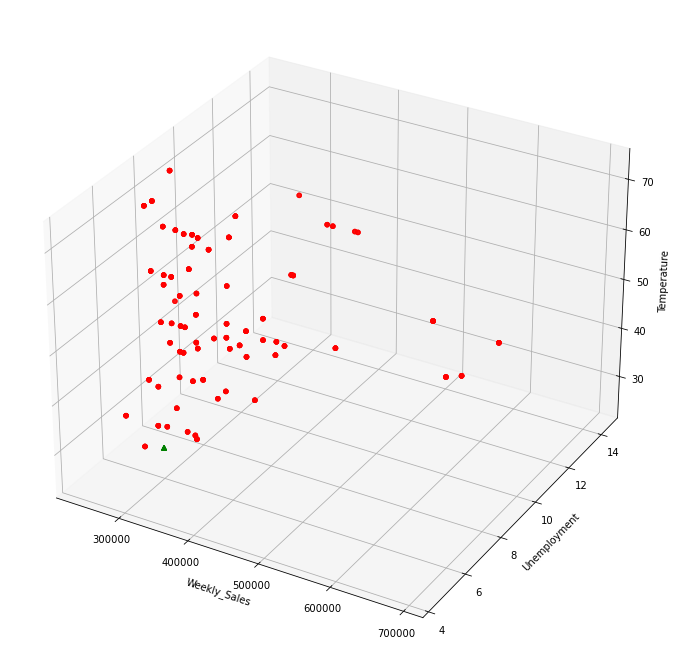

In [22]:
# Plot the raw data  

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')



x_ax_b_unemp = np.array(feature0_b_unemp)
y_ax_b_unemp = np.array(feature1_b_unemp)
z_ax_b_unemp = np.array(feature2_b_unemp)

x_ax_g_unemp = np.array(feature0_g_unemp)
y_ax_g_unemp = np.array(feature1_g_unemp)
z_ax_g_unemp = np.array(feature2_g_unemp)


ax.scatter(x_ax_b_unemp, y_ax_b_unemp, z_ax_b_unemp, marker='o', c = 'red')
ax.scatter(x_ax_g_unemp, y_ax_g_unemp, z_ax_g_unemp, marker='^', c = 'green')



ax.set_xlabel('Weekly_Sales')
ax.set_ylabel('Unemployment')
ax.set_zlabel('Temperature')



plt.show()